# O cálculo da anomalia bouguer para o mundo inteiro

Notebook que demonstrará o cálculo da Anomalia bouguer para o mundo inteiro

## Importando bibliotecas

Importando as bibliotecas que serão utilizadas para manipulação e visualização dos dados de gravidade.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import harmonica as hm
import pygmt 

In [2]:
import normal_gravity

## Carregando os dados do modelo geopotencial XGM2019e

Dados baixados do [*International Center for Global Earth Models* (ICGEM)](http://icgem.gfz-potsdam.de/home).

In [3]:
fname_gravity = 'dataset/earth_gravity_XGM2019e.gdf'
fname_geoid = 'dataset/geoid_XGM2019e.gdf'
fname_topo = 'dataset/topography_etopo1.gdf'

In [4]:
grav = hm.load_icgem_gdf(fname_gravity)
geoid = hm.load_icgem_gdf(fname_geoid)
topo =  hm.load_icgem_gdf(fname_topo)

## Cálculo da gravidade Normal sobre a topografia

### Parâmetros do Elipsoide

In [5]:
a, f, GM, omega = normal_gravity.WGS84()

### Gravidade Normal sobre a topografia (Li and Götze,2001)

[Referência]

Li, X and Götze, H. Ellipsoid, geoid, gravity, geodesy, and geophysics. GEOPHYSICS 2001 66:6, 1660-1668. doi: https://doi.org/10.1190/1.1487109 

In [6]:
gamma = normal_gravity.closedform(a, f, GM, omega, grav.latitude, grav.h_over_geoid)

## Calculando a anomalia bouguer para o mundo inteiro

In [7]:
disturbance = grav.gravity_earth - gamma

In [11]:
topography_ell = topo.topography_shm + geoid.geoid

In [12]:
bouguer = hm.bouguer_correction(topography_ell,density_crust=2670, density_water=1040)

In [15]:
disturbance_topofree = disturbance - bouguer

grdgradient [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


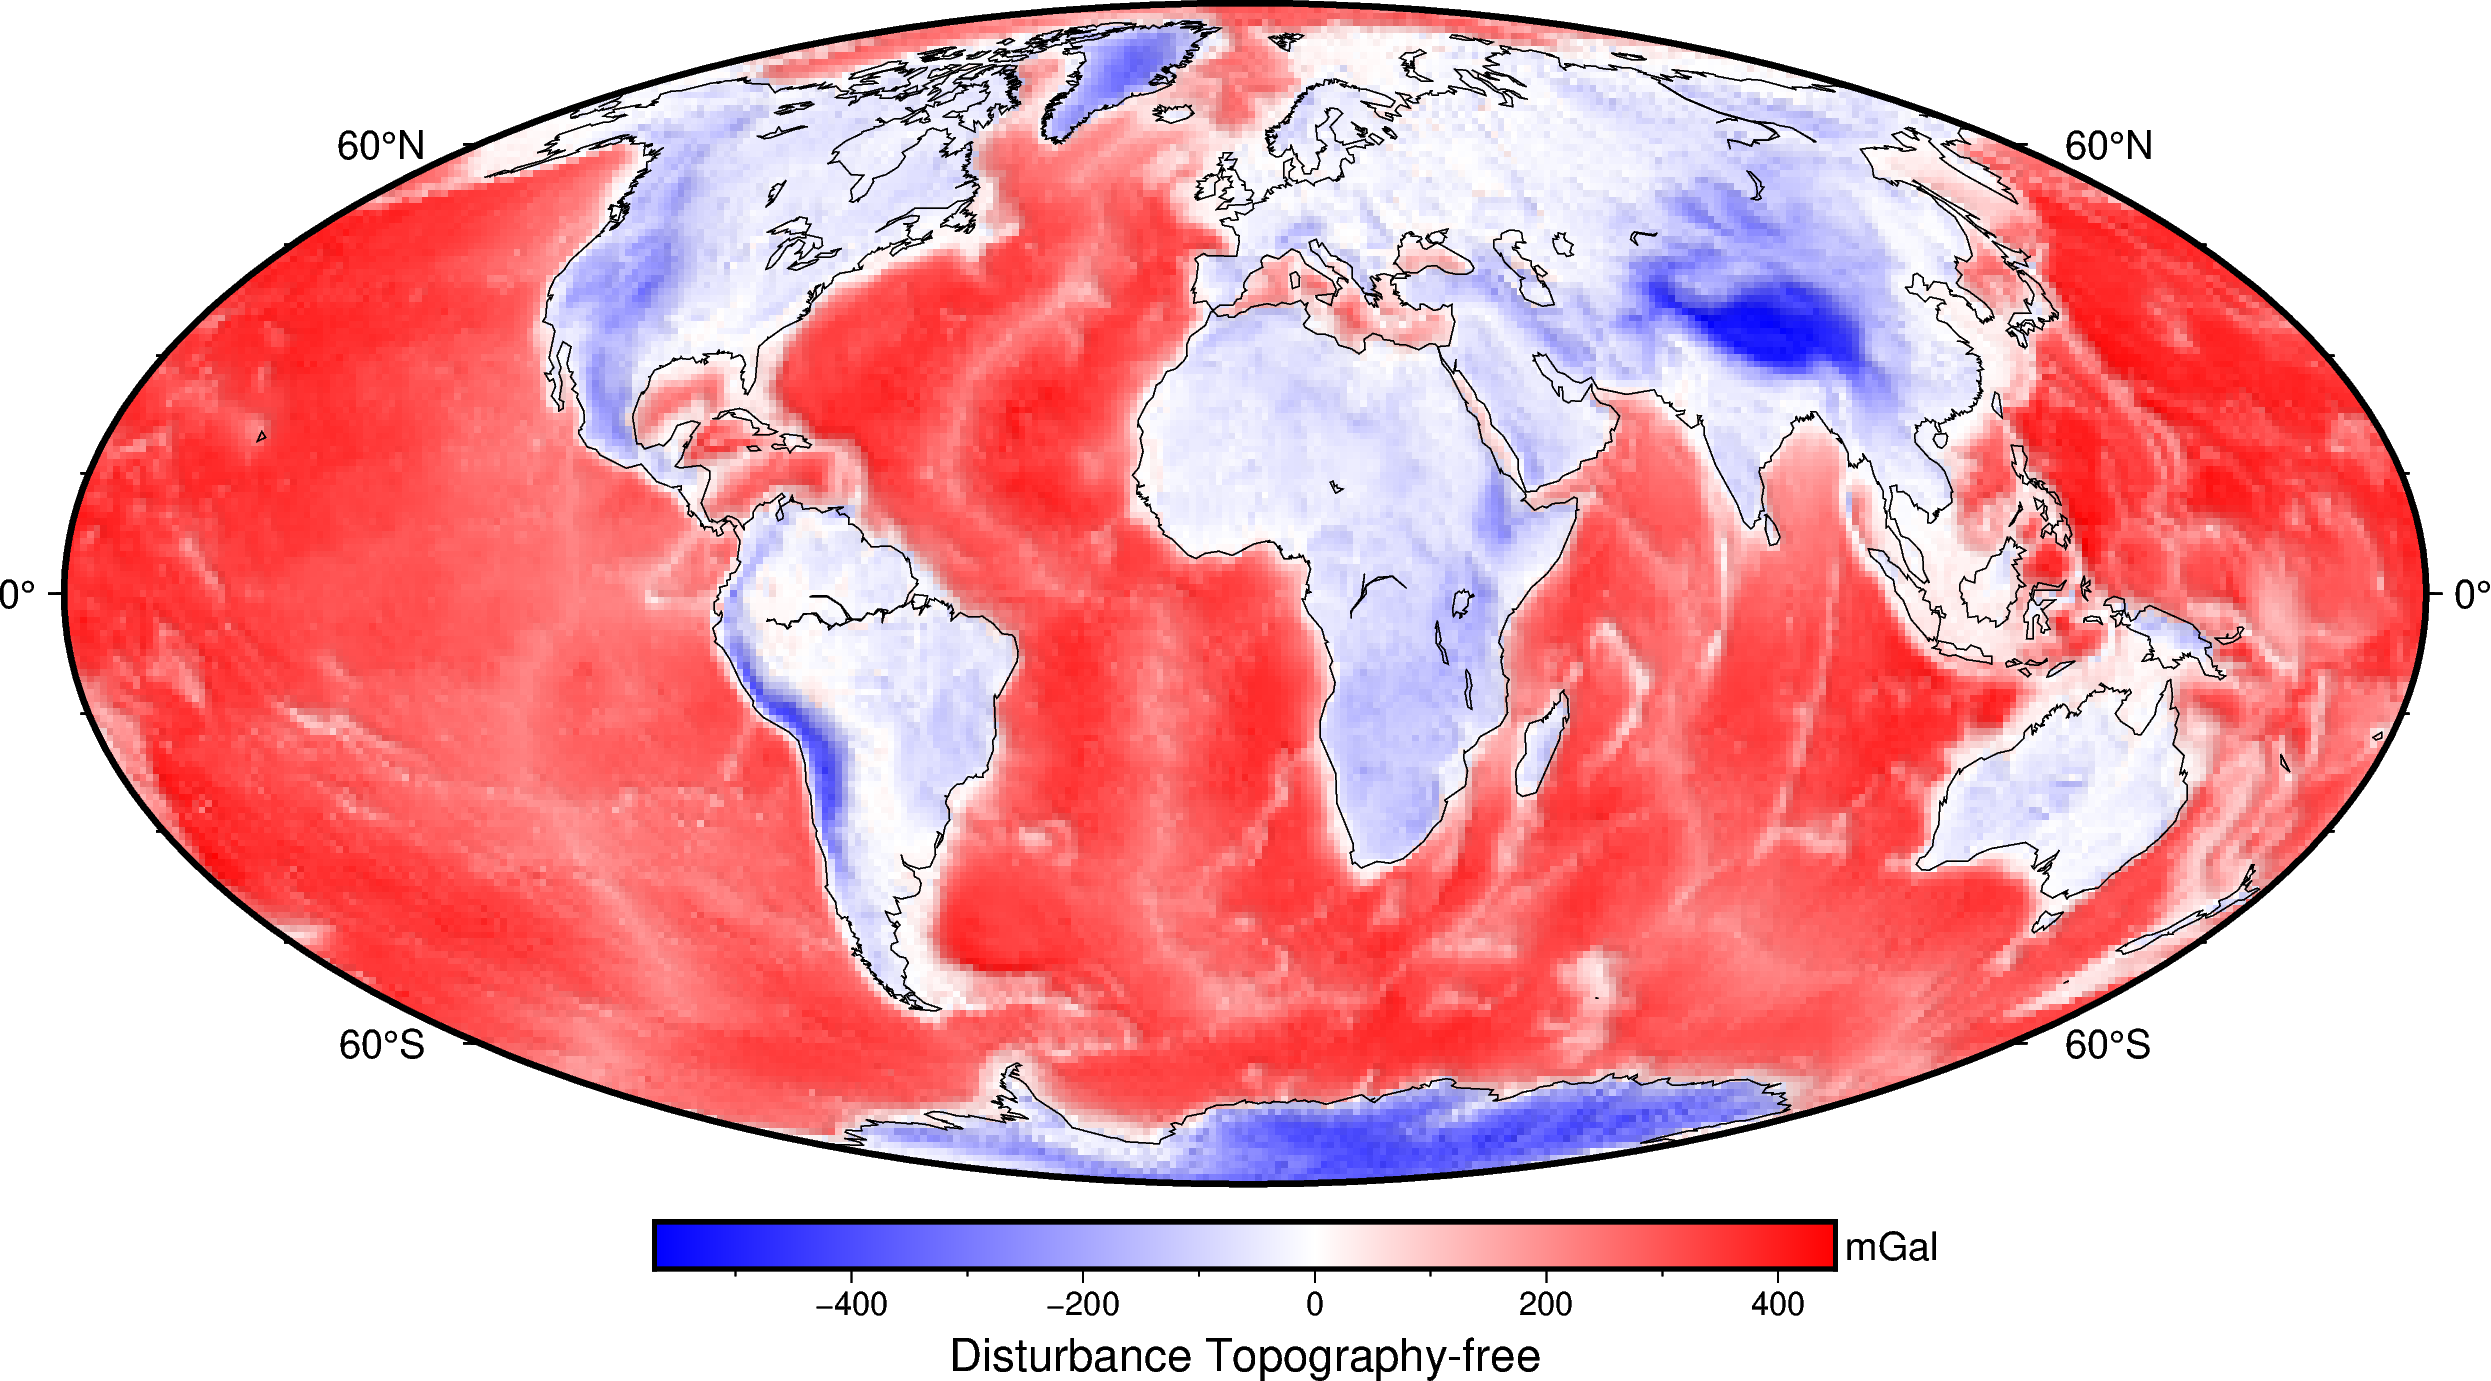

In [17]:
fig = pygmt.Figure()
fig.grdimage(
    disturbance_topofree,
    projection="W20c",
    cmap="polar+h",
    shading="+a45+nt0.2",
)
fig.basemap(frame=["af", "WEsn"])
fig.colorbar(
    position="JCB+w10c",
    frame=["af", 'y+l"mGal"', 'x+l"Disturbance Topography-free"'],
)
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
fig.savefig('images/gravity_disturbance.png', dpi=200)
fig.show()